<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Multivariable_LinearRegression_Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression Emplying Categorical Variables (Case Study)**
---

![Insurance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQX9gTbY0gPxjgz5I82g_OQvREOlDbpKqqlrw&s)

**Image taken from**: [Empire Magazine](https://images.bauerhosting.com/empire/2022/01/EMPIRE-100-Greatest-Movies-List.jpg?ar=16%3A9&fit=crop&crop=top&auto=format&w=1440&q=80)

###**1. Load Data from Kaggle data repository**
---

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle/'


We load a dataset containing information about movies ultimate metrics, features and statistics.

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance
#!kaggle datasets download -d open-source-sports/baseball-databank

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 20.7MB/s]


Now, we decompress the files:

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile(
    '/content/insurance.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


Load the data employing `Pandas` library:

In [ ]:
import pandas as pd
dir_path = '/content/insurance.csv'
insurance = pd.read_csv(dir_path, index_col = False)

#We use this code to remove the column called "id".
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

###**2. Exploratory Data Analysis (EDA)**
---

**2.1 Information contained within the dataset**:

In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance.describe().round(3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


**2.2 Identify the type of data contained within each column of the datset**


`int64` -> Numerical Value (Integer)

`object` -> Categorical variable (Text)

`float64` -> Numerical Value (Decimal)


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Identify the uninque categories belongig to our target categorical variable.
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

**2.3 Data dimensionality**:

In [ ]:
#Dimensions of the dataset
insurance.shape

(1338, 7)

**2.2 Graphical representation of target variables**:

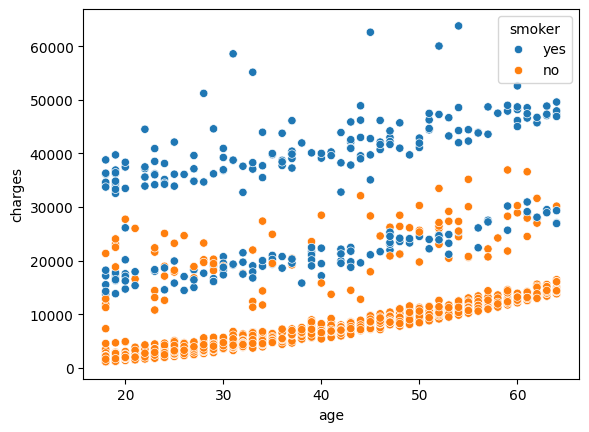

In [ ]:
import numpy as np
import seaborn as sns
sns.scatterplot(data = insurance, x = 'age',
        y='charges', hue = 'smoker');

As we can observe on the graph above, there is a clear distinction between smoker and non-smokers and their relationship with *insurance charges*.

**2.3 Quick overview of the categories (smoker)**


First, we group the charges by the target categorie (smoker) to identify possible differences between them when dealing with **charges**.

In [ ]:
#Code that groups the data by category (smoker), calculates the mean of charges
#according to these categories, and round the results up to three decimal places.
insurance.groupby('smoker')['charges'].mean().round(3)

,charges
smoker,
no,8434.268
yes,32050.232


###**3. Linear Regression**
---

In the present example, we will deal with a multivariable regression including a categorical variale within the analysis, as an interaction factor.

**3.1 Libraries**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Method I**: First, we need to transform the categorical variables into numerical values by employing the built-in Python function `get_dummies`:

In [ ]:
insurance = pd.concat((insurance,
                      pd.get_dummies(insurance['smoker'],
                                     drop_first = True,
                                     dtype = int)),
                                     axis = 1)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


Rename the column **yes** by **smoker_status**:

In [ ]:
insurance = insurance.rename(columns = {'yes': 'smoker_status'})

# Make sure that the rename changes took place.
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_status'],
      dtype='object')

**3.2 Choose the independent and dependent variables (X, y)**

This method uses `numpy` arrays instead of `pandas` Data Frames.

In [ ]:
# This method uses numpy arrays instead of pandas Data Frames.
y = insurance['charges']
X = insurance[['age', 'bmi', 'smoker_status']]
X_model = sm.add_constant(X)
X_model[:5]

,const,age,bmi,smoker_status
0,1.0,19,27.900,1
1,1.0,18,33.770,0
2,1.0,28,33.000,0
3,1.0,33,22.705,0
4,1.0,32,28.880,0


**3.3 Fit the (Ordinary Least Square - OLS) Model**

In [ ]:
model_ols = sm.OLS(y, X_model)
results = model_ols.fit()
parameters = results.params
parameters

,0
const,-11676.830425
age,259.547492
bmi,322.615133
smoker_status,23823.684495


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:33:14   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.168e+04    937.569    -12.454

**Method II**: Using the `statsmodels` API formula and formula strings:


In [ ]:
results_ols = smf.ols('charges ~ age + bmi + smoker_status',
                      data = insurance).fit()
results_ols.params

,0
Intercept,-11676.830425
age,259.547492
bmi,322.615133
smoker_status,23823.684495


In [ ]:
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:33:14   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.168e+04    937.569    -12.454

###**4. Make Predictions**

By employing the model , we can make predictions of possible *insurance charges* given the recorded *age, bmi*, and *smoker_status*, respectively.

In [ ]:
df_pred = pd.DataFrame({'predicted_values': results_ols.predict(insurance),
                        'observed_values': insurance['charges']})
df_pred.head()

,predicted_values,observed_values
0,26079.218615,16884.92400
1,3889.737458,1725.55230
2,6236.798721,4449.46200
3,4213.213387,21984.47061
4,5945.814340,3866.85520


We can als create a column containing the residuals:

*$Square Residuals = (obs - pred)^{2}$*

In [ ]:
obs = np.array(df_pred['observed_values'])
exp = np.array(df_pred['predicted_values'])
df_pred['residuals_square'] = (obs-exp)**2
df_pred.head()

,predicted_values,observed_values,residuals_square
0,26079.218615,16884.92400,8.453505e+07
1,3889.737458,1725.55230,4.683697e+06
2,6236.798721,4449.46200,3.194573e+06
3,4213.213387,21984.47061,3.158176e+08
4,5945.814340,3866.85520,4.322071e+06


###**Scatter Plot (Observed vs. Predicted)**

Shows the relationship between observed and predicted protein production rates. The black dashed line represents a **perfect fit**.

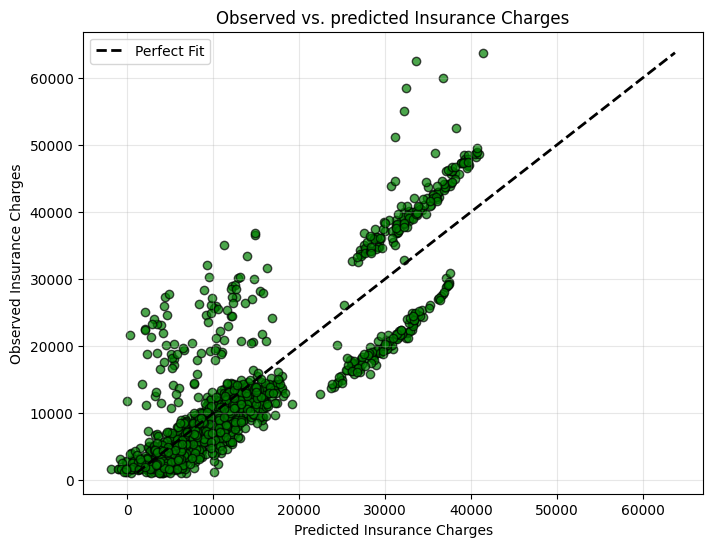

In [ ]:
#Libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Prediced values and residuals
predicted = results_ols.fittedvalues
observed = insurance['charges']

# Scatter plot of observed vs predicted
# 1. Establish the figure size
plt.figure(figsize=(8, 6))
# 2. Create the type of plot (scatter plot in this case)
plt.scatter(predicted, observed, alpha = 0.7, color = 'green', edgecolor = 'k')
# 3. Create the perfect fitted line, which corresponds to the line
# where observed = predicted
plt.plot([observed.min(), observed.max()], [observed.min(), observed.max()],
         color = 'black', linestyle = '--',
         linewidth = 2, label = 'Perfect Fit')
# 4. Plot title and labels
plt.title('Observed vs. predicted Insurance Charges')
plt.xlabel('Predicted Insurance Charges')
plt.ylabel('Observed Insurance Charges')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

###**Residuals Plot**

Residuals *(Observed-Predicted)* vs predicted values. **A random scatter around the horizontal line at 0 indicates a good fit without systematic bias.**

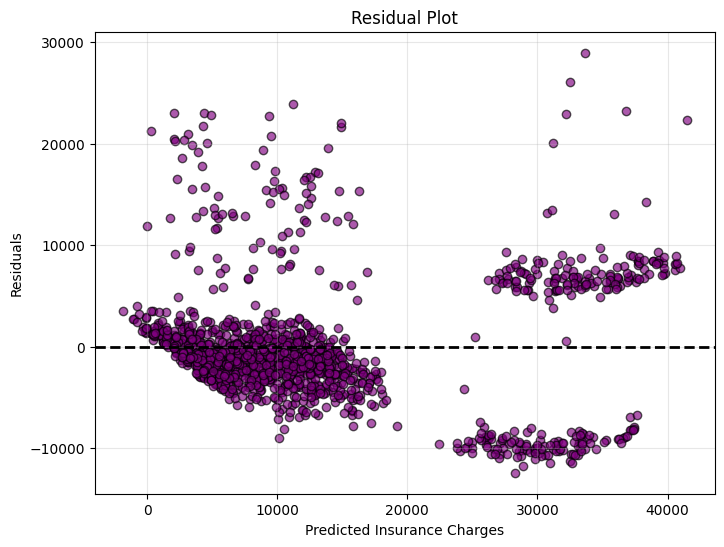

In [ ]:
# Residuals plot
# 1. Get the residuals from the model
residuals = results_ols.resid
# 2. Set plot figure size
plt.figure(figsize = (8, 6))
# 3.Set the typeof plot (scatter plot)
plt.scatter(predicted, residuals, alpha = 0.65,
            color = 'purple', edgecolor = 'k')
# 4. Plot an horizintal line in zero to establish model fitness
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 2)
# 5. Plot title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Insurance Charges')
plt.ylabel('Residuals')
plt.grid(alpha = 0.3);
plt.show();

**Note**: According to the **Residuals Plot**, there is a systematic bias clustered between USD 0 and 2,000 insurance charges.  

###**Scatter Plots**:
---
- Each subplot shows the scatter plot of one explanatory variable (age, bmi, smoke) against the dependent variable (i.e., Insurance Charges).
- A fitted line is overlaid on each plot, derived from a univariate OLS (Ordinary Leat Squares) regression.
- Subplots: All three explanatory variable relationships are displayed side by side for easy comparison.

*This visualization helps to observe how individual predictors relate to the response variable and the fit quality of simple linear models.*

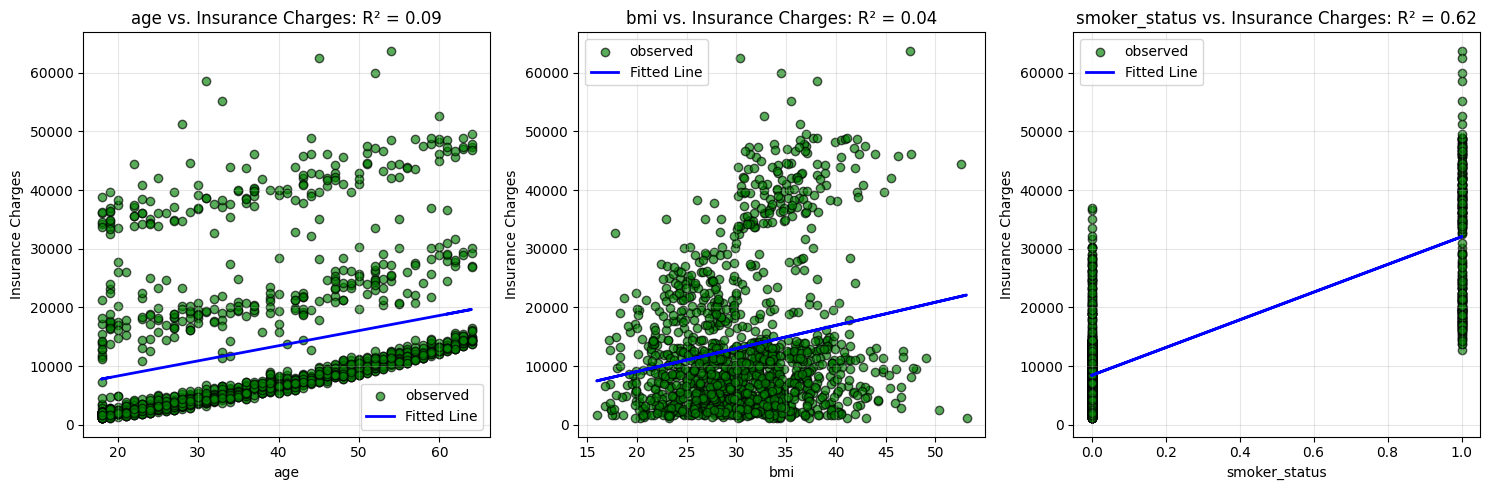

In [ ]:
# Variables for plotting
explanatory = ['age', 'bmi', 'smoker_status']
y = insurance['charges']

# 1. Create scatter plots with fitted lines
plt.figure(figsize = (15, 5))

for i, exp in enumerate(explanatory):
  plt.subplot(1, 3, i + 1)
  X = insurance[exp]
  X_const = sm.add_constant(X) # Add constant for OLS
  model_ols = sm.OLS(y, X_const).fit() # Fit OLS model to each explantory variable
  fitted_line = model_ols.predict(X_const) # Fitted values
  r2 = model_ols.rsquared
  # 2. Scatter plot
  plt.scatter(X, y, alpha = 0.65, color = 'green',
              edgecolor = 'k', label = 'observed')
  plt.plot(X, fitted_line, color = 'blue', linewidth = 2, label = 'Fitted Line')
  plt.title(f'{exp} vs. Insurance Charges: R\u00b2 = {r2:.2f}')
  plt.xlabel(exp)
  plt.ylabel('Insurance Charges')
  plt.legend()
  plt.grid(alpha = 0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_iris
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Species as categorical variable
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Define independent and dependent variables
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length']

# Add constant for intercept
X = sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())

# Compute VIF to check multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          6.98e-109
Time:                        01:02:49   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2627      0.297     -0.883   

In [ ]:
X

,const,sepal_length,sepal_width,petal_width
0,1.0,5.1,3.5,0.2
1,1.0,4.9,3.0,0.2
2,1.0,4.7,3.2,0.2
3,1.0,4.6,3.1,0.2
4,1.0,5.0,3.6,0.2
...,...,...,...,...
145,1.0,6.7,3.0,2.3
146,1.0,6.3,2.5,1.9
147,1.0,6.5,3.0,2.0
148,1.0,6.2,3.4,2.3


In [ ]:
x = [1, 6.2, 3.1, 1.2]
model.predict(x)

array([3.99146071])

In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000
